Sample Class
====================

Instructor: Anton Fadic
---------------------
github.com/antonfadic 

In this class we are going to cover two topics:

* Hypothesis Testing
* Bayesian posterior inference

We are going to start with Hypothesis testing. Some knowledge of probability and statistics is required for this. Feel free to to ask for clarification at any point. Our first example is at the casino

## Hypothesis testing

In reality you have no way to tell from this one experiment, but now that you have it you think:  __is this die fair for number 3?__

Your mission: __demonstrate with a certain degree of belief that the die is not fair for number 3__. 

#### Establishing the hypothesis

$ H_0: P(X=3) = 1/6$

$ H_a: P(X=3) < 1/6$ 

If we fail to reject the null hypothesis, we say that there is __insuficient information to reject $H_0$, leading to status quo.__ 

#### Testing the hypothesis

We call this the __test statistics__ 

$P(X=3) = \hat p =  $ \# of 3s obtained / \# number experiments 

you run the experiments, obtaining:

In [17]:
import numpy as np
p_real = 1/7 #the actual parameter, to which you have no access directly
n_trials = 100
s = np.random.binomial(1,p_real,n_trials)
s_sum = sum(s)
print(s_sum)

14


succeses, so that:

$\hat p =0.14$. 

$N$ is distributed binomial

$P(N) = \binom{n}{N} p^N (1-p)^{n-N}$

We can use the central limit theorem to approximate it normal

$N \sim N(\mu, \sigma^2)$

With mean $\mu$ and variance $\sigma^2$ 

$E(N) = \mu = n p$  

$V(N) = \sigma^2 = n {p(1-p)}$


Let us do our test for the parameter $p$, the proportion of successes. Computing the mean and variance for our test statistics $\hat p$, defined as $N/n$:

$E(N/n) = \frac{\mu}{n} = p$

$V(N/n) = \frac{\sigma^2}{n^2} = \frac{p(1-p)}{{n}}$

What parameter of p do we choose? 

__Under the null hypothesis__ the parameters:
${\mu_0} = 1/6$  and 
$\sigma_0^2 = 1/6 \cdot (1-1/6)/100 = 0.0014$

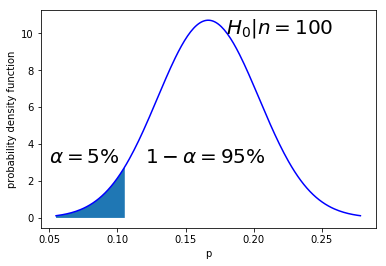

In [216]:
import matplotlib.pyplot as plt
from scipy.stats import norm
p_0 = 1/6
s2_0 = p_0*(1-p_0)/n_trials
s_0 = np.sqrt(s2_0)

x = np.linspace(1/6-3*s_0,1/6+3*s_0, 200)
w = norm.ppf(0.05,p_0,s_0) #here we set the 5% level to reject the null hypothesis, or 95% of confidence
x1 = np.linspace(1/6-3*s_0,w, 200)
fig, ax = plt.subplots(1, 1)

y = norm.pdf(x,p_0, s_0)
y1 = norm.pdf(x1,p_0,s_0)
ax.plot(x, y, 'b-')
plt.fill_between(x1,y1)

plt.xlabel('p')
plt.ylabel('probability density function')

plt.text(0.05, 3, r'$\alpha=5\%$', fontsize=20)
plt.text(0.12, 3, r'$1-\alpha=95\%$', fontsize=20)
plt.text(0.18, 10, r'$H_0|n=100$', fontsize=20)

plt.show()

Note that our alternative hypothesis is a __one sided test__. 

$P(p \leq 0.14 \lvert \hat p=1/6)< \alpha$

* 1-$\alpha$ is called the confidence level
* $\alpha$ is the probability of making a __type I error__ which is rejecting the null hypothesis $H_0$ when it is true. 

Let's calculate the probability of a type I error in this case. 

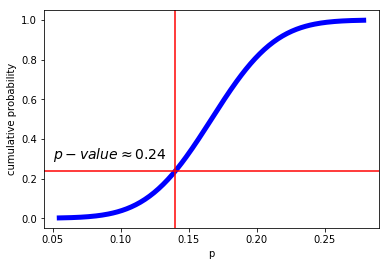

In [311]:
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(1/6-3*s_0,1/6+3*s_0, 200)
fig, ax = plt.subplots(1, 1)

y = norm.cdf(x,p_0, s_0)
ax.plot(x, y, 'b-', lw=5)

plt.axvline(x=0.14, color='r')
plt.axhline(y=norm.cdf(-0.713), color='r', linestyle='-')

plt.text(0.05, 0.3, r'$p-value \approx 0.24$', fontsize=14)

plt.xlabel('p')
plt.ylabel('cumulative probability')
plt.show()

* Standarize the observation __z-score__

$z = \frac{x - \mu}{\sigma} = \frac{p - 1/6}{\sqrt{0.0014}} = \frac{0.14 - 1/6}{\sqrt{0.0014}} = -0.713$

This is just the observed value on a __standarized normal__ distribution $N(0,1)$.

In [129]:
from scipy.stats import norm
norm.cdf(-0.713)

0.23792287856815697

The _p-value_ is way higher than your level of confidence. You cannot reject the null hypothesis under $\alpha=0.05$. What can you do? 
    * You change the level of confidece, reducing it
    * You do more experiments

You do 400 more experiments

In [162]:
n_trials = 400
s = np.random.binomial(1,p_real,n_trials)
s_sum = sum(s)
print(s_sum)

48


with 48 positive results, you calculate the observed proportion as:

$p = 48/400 = 0.12$ 
Let's repeat our test, assuming the null hypothesis $p=1/6$.

The variance for this sample size can be easily calculated as:

$\sigma_2 = \sigma_1 \cdot 100/400$

Let's compare the probability density distribution for the first $n=100$ and $n=400$.

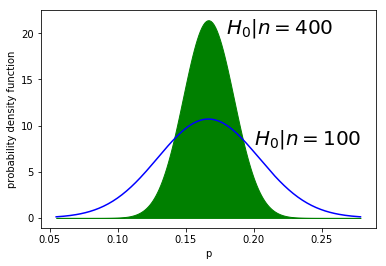

In [278]:
p_0 = 1/6
ntrials_2 = 400
s2_1 = s2_0*100/400
s_1 = np.sqrt(s2_1)

x = np.linspace(1/6-3*s_0,1/6+3*s_0, 200)
x1 = np.linspace(1/6-3*s_0,1/6+3*s_0, 200)
fig, ax = plt.subplots(1, 1)

y = norm.pdf(x,p_0, s_0)
y1 = norm.pdf(x1,p_0,s_1)

ax.plot(x, y, 'b-')
plt.fill_between(x1,y1, color='g')

plt.xlabel('p')
plt.ylabel('probability density function')

plt.text(0.20, 8, r'$H_0 | n=100 $', fontsize=20)
plt.text(0.18, 20, r'$H_0 | n=400 $', fontsize=20)

plt.show()

Standarize the observation of $p=0.12$. 

$z = \frac{0.12 - 1/6}{\sqrt{0.0014*100/400}} = \frac{0.14 - 1/6}{\sqrt{0.00035}}= -1.425$

Which means, that the p-value is:

In [344]:
norm.cdf(-1.425)

0.07707860055207189

interactive(children=(IntSlider(value=240, description='n', max=400, min=100, step=20), Output()), _dom_classe…

<IPython.core.display.Javascript object>


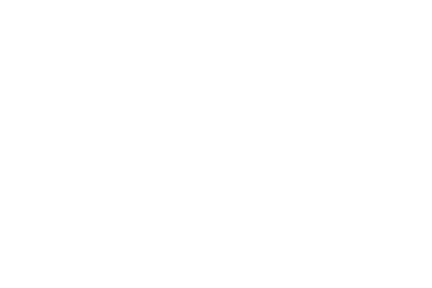

In [365]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x = np.linspace(1/6-3*s_0,1/6+3*s_0, 200)
y = t.pdf(x,df)

def update(n = (100,400,20)):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.fill_between(x, norm.pdf(x,p_0,s_0*10/np.sqrt(n)))
    plt.xlim(1/6-3*s_0,1/6+3*s_0)
    plt.ylim(0,23)
    plt.xlabel('p')
    plt.ylabel('probability density')

    fig.canvas.draw()
interact(update);

## The fine print


### The normality assumption
What if you don't know the variance? 

Under this condition, the normal test that we used earlier is not suitable, and another test has to be used. In this case is the __student's t test__. Warning. This test is suited when you know that the sample comes from a normal distribution. The standarized __t-distribution__ has only one parameter, $\nu$ which is the degrees of freedom. For our case, it is the number of observations minus 1.

$\nu = n - 1$ 

Our test statistics is based on the mean of the sample, $\hat X$ computed as:

$\hat X = \frac{1}{n} \sum_{i=1}^{n} X_i$ 

Sample variance:

$S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i-\mu)^2$

So then, the __t-test statistics t__, which is nothing more than the normalized observation for the t distribution is:

$\hat t = \frac{\hat X - \mu}{\frac{S}{\sqrt n}}$

And then:

$t \sim t(n-1)$

All the rest studied for a normal distribution applies in this case. 

### Example 2

Us population height. 

$H_0: \mu = 71$

and your alternative hypothesis is

$H_a: \mu \neq 71$ 
    
$1-\alpha = 90\%$

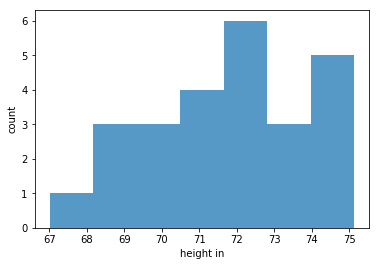

In [273]:
p2_real = 72
s2_real = 2.8
#values= np.random.normal(p2_real,np.sqrt(s2_real),25)
n, bins, patches = plt.hist(values,7, alpha=0.75)
plt.xlabel('height in')
plt.ylabel('count')
plt.show()

Let's calculate the sample mean and variance of our observations:

In [274]:
print(np.mean(values))
print(np.var(values, ddof=1)) #ddof is delta degrees of freedom. It is the numerator n-ddof, which in our case is 1

71.81862513014295
4.4221024299935054


$\hat t = \frac{\hat X - \mu}{\frac{S}{\sqrt n}} = \frac{71.818 - 71}{\sqrt \frac{4.422}{25}} = \frac{0.818\cdot5}{\sqrt{4.422}} = 1.945 \sim t(24)$

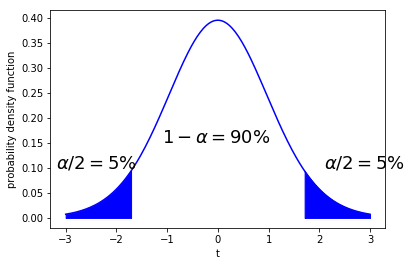

In [312]:
from scipy.stats import t
df = 24

x = np.linspace(-3,3, 200)
w1 = t.ppf(0.05,df)
x1 = np.linspace(-3,w1, 200)
w2 = t.ppf(0.95,df)
x2 = np.linspace(w2,3, 200)
fig, ax = plt.subplots(1, 1)

y = t.pdf(x,df)
y1 = t.pdf(x1,df)
y2 = t.pdf(x2,df)

ax.plot(x, y, 'b-')
plt.fill_between(x1,y1, color = 'b')
plt.fill_between(x2,y2, color = 'b')

plt.xlabel('t')
plt.ylabel('probability density function')

plt.text(-1.1, 0.15, r'$1-\alpha = 90\%$', fontsize=18)
plt.text(-3.2, 0.1, r'$\alpha/2 = 5\%$', fontsize=18)
plt.text(2.1, 0.1, r'$\alpha/2 = 5\%$', fontsize=18)
plt.show()

In [260]:
print(t.ppf(0.95,df))

1.7108820799094275


$\frac{p}{2} = P(t>\hat t) = 1 - P(t<\hat t) = 1 - P(t<1.945) $

In [265]:
print(1 - t.cdf(1.945,df))
print((1 - t.cdf(1.945,df))*2*100)

0.031790954723862286
6.358190944772457


It is important to mention that this is under the assumption that the distribution generating the samples is normal. Note how the methodology changed by having a two tailed test given by the alternative hypothesis. __It is very important to check the null hypothesis and the alternative hypothesis before concluding solely on the p-value!__ Consider at least the sample size and the test!.

### Summary

When doing hypothesis testing, check the following.

* Do you know the distribution of your data? Is it normal? Do you know the population variance?
* If you don't know the variance, but you know that the data comes from a normal, you can use the student t distribution with n-1 degrees of freedom. You can approximate the population variance by the sample variance.
* To do hypothesis testing you need: A null hypothesis $H_0$, and alternative hypothesis $H_a$, a level of confidence $1-\alpha$, data, and a test statistics $\hat p$. 
* Be aware of type I and type II errors, and how they relate to the level of confidence.
* Don't trust blindly on the p-value.

## Setting the level of confidence. Precision and recall

As you can see, setting the level of confidence affects our decision of rejecting or not rejecting the null hypothesis. As we said, rejecting the null hypothesis when it is true is called __type I error__. Another type of error is non-rejecting the null hypothesis when it is false. This is called __type II error__. In our first example we found that the p-value was of 0.237. Had we lowered our level of confidence to a lower value than the 1- p-value, we would have been able to reject the null hypothesis of the fair die for the number 3. If the null hypothesis was true, meaning that the die was fair, and we had rejected it, we would have commited a type I error. This is equivalent of having detected a __false positive, or a false alarm.__

Likewise, as we know that the die was loaded, with that test we commited a type II error. That is, in this case we __missed__. As you can see already, the classification of rejection or non rejection is dependent on the level of confidence. A very stringent level of confidence can make us classify all the results as non-rejecting, leading to a high level of type II errors. Likewise, setting a very low level of confidence can lead us to decide that all null hypothesis are false, and therefore, high numbers of type I errors. Clearly there is a tradeoff, and in real applications there are more things to consider.

__Type I errors and Type II errors can have very different consequences!__

 __Precision__ 

$pr = \frac{tp}{tp+fp}$ 


__Recall__ 

$re = \frac{tp}{tp+fn}$

One way to combine both measures of effectivness of the test is called the __F$_1$ score__, computed as:

$F_1 = \frac{2}{\frac{1}{pr} + \frac{1}{re}}$ 

Another way to combine both of them:

$F_{\beta} = (1+\beta^2) \frac{1}{\frac{\beta^2}{re} + \frac{1}{pr}}$